**Exercise 4.1**

i) Generate an array of random integer numbers in range [10,1000] with size 100;
 
ii) Discretize this array into k= 10 bins, such that each bin is of equal width using (delta = xmax - xmin/k);

iii) Plot the histogram;

iv) Reapet i)-iii) by generating an array of random numbers by normal distribution with (loc=0.0, scale=1.0, size = 100);

v) Generate an array of random numbers by lognormal distribution with (mean=2.0, sigma=2.0, size=100) and plot the histogram by setting bins as [0, 1, 2, 5, 10, 20, 30, 40, 50, 60, 70, 80,90, 100].

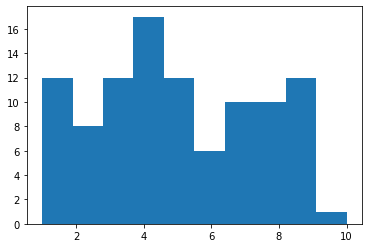

In [5]:
import numpy as np
#Generate an array of random integer numbers in range [10,1000] with size 100;
int_list = np.random.randint(low=10, high=1000, size=100)

#Discretize this array into k= 10 bins, such that each bin is of equal width using (delta = xmax - xmin/k)
bins = np.linspace(min(int_list), max(int_list), 10)
digitized = np.digitize(int_list, bins)
#Plot the histogram;
import matplotlib.pyplot as plt
plt.hist(digitized);

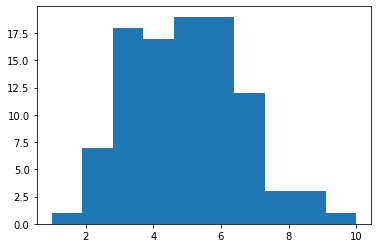

In [7]:
#Repeat i)-iii) by generating an array of random numbers by normal distribution with (loc=0.0, scale=1.0, size = 100)
norm_list = np.random.normal(loc=0, scale=1, size=100)
bins = np.linspace(min(norm_list), max(norm_list), 10)
digitized = np.digitize(norm_list, bins)
plt.hist(digitized);

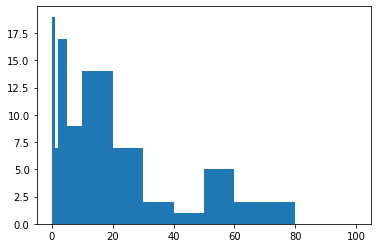

In [9]:
#Generate an array of random numbers by lognormal distribution with (mean=2.0, sigma=2.0, size=100) and plot the histogram by setting bins as [0, 1, 2, 5, 10, 20, 30, 40, 50, 60, 70, 80,90, 100]
log_list = np.random.lognormal(mean=2, sigma=2, size=100)
bins = [0, 1, 2, 5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
plt.hist(log_list, bins=bins);

**Exercise 4.2**

Generate a data frame with 3 columns and 200 rows by selecting randomly selected numers: use for the first column the "normal" distribution with (loc=0.0, scale=1.0, size=200) and for the last 2 columns the "lognormal" distribution with (mean=0.0, sigma=2.0, size=200) and (mean=1.0, sigma=3.0, size=200).

Find any outlier with a z-value > 3 or z-value < -3 and replace that with the mean of the values, eg perform Mean substitution for outliers.

Write a report about cells with outliers, thier z-scores and substituted values. 


In [63]:
import numpy as np
import pandas as pd
data = pd.DataFrame(columns=['norm', 'log1', 'log2'])
data.iloc[:,0] = np.random.normal(loc=0, scale=1, size=200)
data.iloc[:,1] = np.random.lognormal(mean=0, sigma=2, size=200)
data.iloc[:,2] = np.random.lognormal(mean=1, sigma=3, size=200)
data.head()

,norm,log1,log2
0,0.642040,0.155066,0.233522
1,0.412962,0.095013,7.621451
2,-2.234176,0.588720,8.603647
3,1.584047,0.997167,0.178414
4,-0.480033,1.392511,0.319754


In [64]:
#create dataframe for z-scores
dataz = pd.DataFrame(columns=['norm', 'log1', 'log2'])
#compute z scores
for col in list(dataz.columns):
    col_zscore = col + '_zscore'
    dataz[col_zscore] = (data[col] - data[col].mean())/data[col].std(ddof=0)
#drop redundant columns
dataz = dataz.drop(['norm', 'log1', 'log2'], axis=1)
dataz

,norm_zscore,log1_zscore,log2_zscore
0,0.600909,-0.341494,-0.146368
1,0.379500,-0.344880,-0.136488
2,-2.179018,-0.317040,-0.135174
3,1.511381,-0.294007,-0.146442
4,-0.483599,-0.271713,-0.146253
...,...,...,...
195,-0.554722,-0.279792,-0.142973
196,1.487063,-0.283799,-0.140394
197,2.295204,-0.163377,0.055019
198,-0.865268,-0.253939,-0.029356


In [65]:
#outliers
m = np.abs(dataz) > 3
data[m.values]

,norm,log1,log2
9,-0.526588,155.019945,1.440383
103,0.461634,0.761700,3982.833815
113,-1.124514,88.137945,0.566005
123,0.182450,118.702145,0.003268
134,0.775608,71.858343,19.931678
165,-0.525572,0.639257,9720.161175


In [66]:
#create mask
m = np.abs(dataz) > 3
#replace |z|>3 --> NaN
data = data.mask(m.values, np.nan)
#replace NaN --> column mean
data = data.fillna(data.mean())
data

,norm,log1,log2
0,0.642040,0.155066,0.233522
1,0.412962,0.095013,7.621451
2,-2.234176,0.588720,8.603647
3,1.584047,0.997167,0.178414
4,-0.480033,1.392511,0.319754
...,...,...,...
195,-0.553620,1.249242,2.772058
196,1.558887,1.178185,4.700311
197,2.395020,3.313653,150.823956
198,-0.874922,1.707704,87.731315


I created mask for dfz dataframe(|z|>3 -->True, otherwise - False). Then I applied this mask to original dataframe df and replaced all outliers with nans. Finally I replaced nans with column mean. I printed outliers and we can see that they are present only in log1 and log2 columns

**Exercise 4.3: PCA**

1) Apply PCA to the data - output of **Exercise 4.2** (where all outliers are with substituted values) in order to reduce the dimension from 3 to 2 (use "PCA(n_components = 2)". 

2) Transform your data (3 dimensional) to a new data (2 dimensional) by applying "pca.transform", then print the shapes and the first 5 rows of your data and new/transformed data.

In [67]:
from sklearn.decomposition import PCA
#create pca object
pca = PCA(n_components=2)
#fit and transform data
data_pca = pca.fit_transform(data)
#create dataframe for transformed data
data_pca = pd.DataFrame(data_pca)
print('Initial data', '\n', data.head())
print()
print('Transformed data', '\n', data_pca.head())

Initial data 
        norm      log1      log2
0  0.642040  0.155066  0.233522
1  0.412962  0.095013  7.621451
2 -2.234176  0.588720  8.603647
3  1.584047  0.997167  0.178414
4 -0.480033  1.392511  0.319754

Transformed data 
            0         1
0 -41.355653 -3.911254
1 -33.967830 -3.981202
2 -32.985005 -3.476905
3 -41.409478 -3.073368
4 -41.267632 -2.668843
